In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def get_name_job(magnitude):
    name_job = '%.2E' % (magnitude/100)
    name_job = name_job.replace('.', '')
    name_job = 'heatflux' + name_job.replace('+', '')
    return name_job

num_change_flux = 10
magnitude = np.linspace(10e6, 10e10, num_change_flux)

xy_data = []

for i in range(num_change_flux):
    name_job = get_name_job(magnitude[i])
    with open('saved_data'+name_job, 'rb') as f:
        xy_data.append(pickle.load(f))

In [6]:
num_crystal = 10
num_timestep = 17
num_points = 61

xy = np.empty((num_crystal, num_timestep, num_points, 2))

for i in range(10):
    for j in range(17):
        xy[i, j, :, :] = np.array(xy_data[i][0][j])[range(num_points), :]

y_value_only = xy[:, :, :, 1]
last_timestep = y_value_only[:,-1,:].squeeze()
highest_e = y_value_only[-3:-1, :, :].squeeze()
max_last_ts = np.max(last_timestep, axis=1)

loc_max_last_ts = np.argmax(last_timestep, axis=1)
peak_loc_thro_t = np.argmax(y_value_only[-3:-1, :, :], axis=2)
peak_stress_value = np.max(highest_e, axis=2)

peak_location = 17
yield_stres = 1.5e17
yield_time = np.empty((num_crystal))

for i in range(num_crystal):
    for j in range(num_timestep):
        if np.max(y_value_only[i, j]) > yield_stres:
            yield_time[i] = j
            break


In [81]:
y_value_only.shape

(10, 17, 61)

Text(0.5, 1.0, 'Energy required to achieve yielding stress')

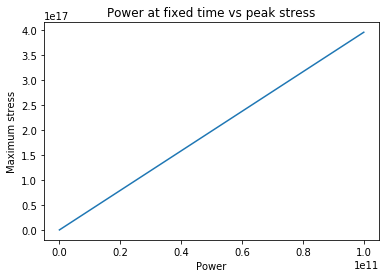

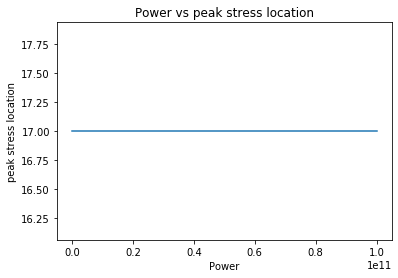

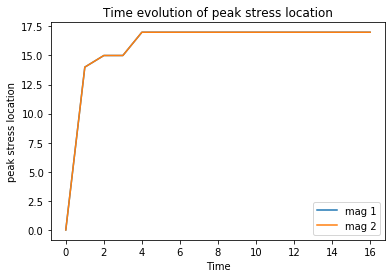

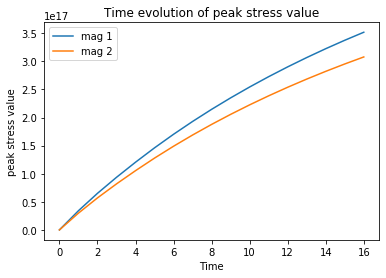

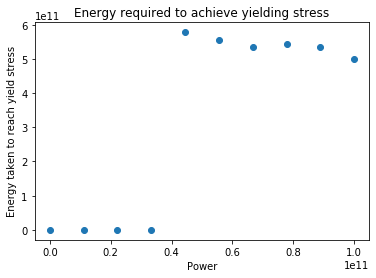

In [16]:
plt.figure()
plt.plot(magnitude, max_last_ts)
plt.xlabel('Power')
plt.ylabel('Maximum stress')
plt.title('Power at fixed time vs peak stress')

plt.figure()
plt.plot(magnitude, loc_max_last_ts)
plt.xlabel('Power')
plt.ylabel('peak stress location')
plt.title('Power vs peak stress location')

plt.figure()
plt.plot(peak_loc_thro_t[-1,:])
plt.plot(peak_loc_thro_t[-2,:])
plt.legend(('mag 1', 'mag 2'))
plt.xlabel('Time')
plt.ylabel('peak stress location')
plt.title('Time evolution of peak stress location')

plt.figure()
plt.plot(peak_stress_value[-1,:])
plt.plot(peak_stress_value[-2,:])
plt.legend(('mag 1', 'mag 2'))
plt.xlabel('Time')
plt.ylabel('peak stress value')
plt.title('Time evolution of peak stress value') 

plt.figure()
plt.scatter(magnitude, yield_time*magnitude)
plt.xlabel('Power')
plt.ylabel('Energy taken to reach yield stress')
plt.title('Energy required to achieve yielding stress') 

array([6.23042070e-300, 5.19633982e-297, 3.75956195e-296, 5.93517431e-296,
       5.77850000e+011, 5.55600000e+011, 5.33360000e+011, 5.44460000e+011,
       5.33340000e+011, 5.00000000e+011])